In [1]:
import uproot
# import ROOT
import matplotlib.pyplot as plt

In [22]:
# combine comamnd used to make the root file
"""
multipdf:
    combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1

freezing multipdf with index=0
    combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=0 -n fixed_pdf_0 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
freezing multipdf with index=1
    combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=1 -n fixed_pdf_1 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
freezing multipdf with index=2
    combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=2 -n fixed_pdf_2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
        
"""

'\nmultipdf\ncombine -M MultiDimFit -d combine_test_datacard.txt --points 100 --algo grid --setParameterRanges r=50,1500 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope -m 125 --setParameters myIndex=-1 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1\n'

In [27]:
load_path = "./higgsCombineEnvelope.MultiDimFit.mH125.root"
file = uproot.open(load_path)

In [28]:
print(file.keys())
file['limit'].keys()
nll_arr = file['limit']['nll'].array()
r_arr = file['limit']['r'].array()

['toys;1', 'limit;1']


In [29]:
# file['limit'].keys()
print(file['limit']['r'].array())
print(file['limit']['deltaNLL'].array())


[200, 132]
[0, 2.63e+03]


In [6]:
# file['limit']['nll'].array()
import numpy as np
nll = file['limit']['nll'].array()
nll0 = file['limit']['nll0'].array()
deltaNLL = file['limit']['deltaNLL'].array()
np.all(deltaNLL == (nll0/nll ))

False

In [7]:
nll0+nll

<Array [2.28e+05, 2.28e+05, ..., 2.28e+05, 2.28e+05] type='51 * float64'>

In [33]:
def getRandNLL(load_path: str):
    file = uproot.open(load_path)
    nll = file['limit']['nll'].array()
    nll0 = file['limit']['nll0'].array()
    deltaNLL = file['limit']['deltaNLL'].array()
    y_arr = 2*(deltaNLL + nll0 + nll)[1:]
    # y_arr = 2*(deltaNLL)[1:]
    x_arr = file['limit']['r'].array()[1:]
    # print(f"file['limit']['r']: {file['limit']['r'].array()}")
    return x_arr, y_arr

x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]


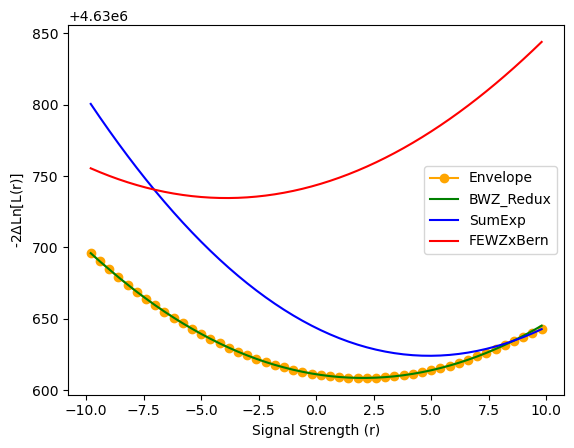

In [74]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope.MultiDimFit.mH125.root",
    "BWZ_Redux": "./higgsCombinefixed_pdf_0.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1.MultiDimFit.mH125.root",
    "FEWZxBern": "./higgsCombinefixed_pdf_2.MultiDimFit.mH125.root",
    # "PowerLaw": "./higgsCombinefixed_pdf_2.MultiDimFit.mH125.root",
    # "BWZxBern": "./higgsCombinefixed_pdf_3.MultiDimFit.mH125.root",
}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "FEWZxBern": "Red",
    # "PowerLaw": "Red",
    # "BWZxBern": "Purple",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    print(f"x_arr: {(x_arr)}")
    print(f"y_arr: {y_arr}")
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
# plt.xlim([0.0, 10.0])
# plt.xlim([-10.0, 0.0])
# plt.ylim([-100, 20000])
# plt.ylim([1.2e6, 1.4e6])
plt.xlabel("Signal Strength (r)")
# plt.ylabel("-2lnL(r) + c")
plt.ylabel("-2$\\Delta$Ln[L(r)]")
plt.show()

In [52]:
import ROOT as rt
f = rt.TFile("./combine_test_datacard.root")
# ws = f.FindObjectAny("")
f.ls()
ws = f.Get("w")

TFile**		./combine_test_datacard.root	
 TFile*		./combine_test_datacard.root	
  KEY: RooWorkspace	w;1	w
  KEY: TProcessID	ProcessID0;1	0b98ba46-3efe-11ef-b9b5-900b050abeef


In [54]:
# ws.Print()
ws.var("r").Print("v")

--- RooAbsArg ---
  Value State: clean
  Shape State: clean
  Attributes:  [SnapShot_ExtRefClone,group_POI] 
  Address: 0x560bd44083d0
  Clients: 
    (0x560bd4407d10,V-) ProcessNormalization::n_exp_bindimuon_mass_proc_signal ""
  Servers: 
  Proxies: 
--- RooAbsReal ---

  Plot label is "r"
--- RooAbsRealLValue ---
  Fit range is [ 0 , 20 ]
--- RooRealVar ---
  Error = 0


In [61]:
import ROOT as rt
f = rt.TFile("./higgsCombineTest.MarkovChainMC.mH120.root")
# ws = f.FindObjectAny("")
f.ls()
ws = f.Get("limit")


TFile**		./higgsCombineTest.MarkovChainMC.mH120.root	
 TFile*		./higgsCombineTest.MarkovChainMC.mH120.root	
  KEY: TDirectoryFile	toys;1	toys
  KEY: TTree	limit;1	limit


In [62]:
ws.Print()

******************************************************************************
*Tree    :limit     : limit                                                  *
*Entries :        0 : Total =            5326 bytes  File  Size =        790 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :limit     : limit/D                                                *
*Entries :        0 : Total  Size=        493 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :limitErr  : limitErr/D                                             *
*Entries :        0 : Total  Size=        505 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [111]:
FEWZ_file = rt.TFile("../data//NNLO_Bourilkov_2017.root", "READ")
FEWZ_file.ls()

TFile**		../data//NNLO_Bourilkov_2017.root	
 TFile*		../data//NNLO_Bourilkov_2017.root	
  KEY: TH1D	full_xsec;1	full_xsec
  KEY: TH1D	full_36fb;1	full_36fb
  KEY: TH1D	full_shape;1	full_shape
  KEY: TH1D	cc_xsec;1	cc_xsec
  KEY: TH1D	cc_36fb;1	cc_36fb
  KEY: TH1D	cc_shape;1	cc_shape
  KEY: TH1D	ncnc_xsec;1	ncnc_xsec
  KEY: TH1D	ncnc_36fb;1	ncnc_36fb
  KEY: TH1D	ncnc_shape;1	ncnc_shape
  KEY: TH1D	one_jet_xsec;1	one_jet_xsec
  KEY: TH1D	one_jet_36fb;1	one_jet_36fb
  KEY: TH1D	one_jet_shape;1	one_jet_shape
  KEY: TH1D	two_jet_xsec;1	two_jet_xsec
  KEY: TH1D	two_jet_36fb;1	two_jet_36fb
  KEY: TH1D	two_jet_shape;1	two_jet_shape


In [112]:
FEWZ_histo_36fb = FEWZ_file.Get("full_36fb")
FEWZ_histo_36fb.Print("v")
FEWZ_histo_full_xsec = FEWZ_file.Get("full_xsec")
FEWZ_histo_full_xsec.Print("v")
FEWZ_histo_full_shape = FEWZ_file.Get("full_shape")
FEWZ_histo_full_shape.Print("v")

TH1.Print Name  = full_36fb, Entries= 50, Total sum= 476441
TH1.Print Name  = full_xsec, Entries= 50, Total sum= 13.2345
TH1.Print Name  = full_shape, Entries= 50, Total sum= 1


In [113]:
# FEWZ_histo = FEWZ_histo_36fb
# FEWZ_histo = FEWZ_histo_full_shape
import numpy as np
def getFEWZ_vals(FEWZ_histo):
    n_points = FEWZ_histo.GetNbinsX()
    x_vals = []
    y_vals = []
    for i in range(n_points):
        if i<0 or i >=42:
            continue
        if (FEWZ_histo.GetBinCenter(i)) < 110.0:
            x_vals.append(110.0)
            y_vals.append(FEWZ_histo.GetBinContent(i+1)*1.05) 
            continue
        if (FEWZ_histo.GetBinCenter(i)) >150:
            x_vals.append(150.0)
            y_vals.append(FEWZ_histo.GetBinContent(i)*0.95)  
            continue
        x_vals.append(FEWZ_histo.GetBinCenter(i))
        y_vals.append(FEWZ_histo.GetBinContent(i))
    return (np.array(x_vals), np.array(y_vals))

In [114]:
x_vals, y_vals = getFEWZ_vals(FEWZ_histo_full_shape)
print(x_vals)
print(y_vals)

[110.  110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5 120.5
 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5 132.5
 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5 144.5
 145.5 146.5 147.5 148.5 149.5 150. ]
[0.06888883 0.06560841 0.05985101 0.05407571 0.05001306 0.04578032
 0.0427122  0.03935657 0.03652706 0.03408782 0.03229583 0.02998172
 0.02769406 0.02642185 0.02475544 0.02336045 0.02238799 0.02100063
 0.02014974 0.01899276 0.01808521 0.01708502 0.01664578 0.01576014
 0.01485364 0.0141665  0.01393876 0.01325116 0.01268733 0.01220556
 0.0116554  0.01108455 0.01086104 0.01035282 0.00991412 0.00976164
 0.00960334 0.00908779 0.00881902 0.00833113 0.00803085 0.00780209]


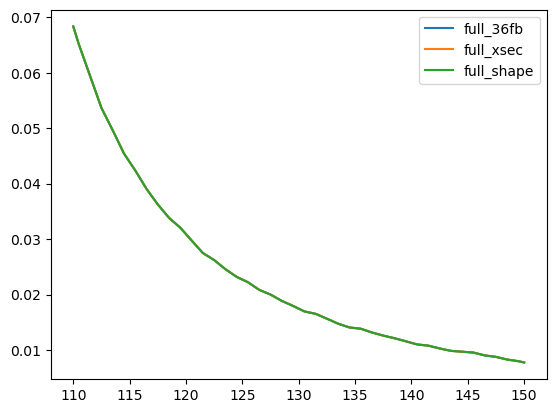

In [115]:
histo_l = [
    FEWZ_histo_36fb,
    FEWZ_histo_full_xsec,
    FEWZ_histo_full_shape,
]
for histo in histo_l:
    x_vals, y_vals = getFEWZ_vals(histo)
    y_vals = y_vals / np.sum(y_vals)
    plt.plot(x_vals, y_vals, label = histo.GetName())
plt.legend(loc="upper right")
plt.show()

In [94]:
str(FEWZ_histo_36fb.GetName())

'full_36fb'

In [73]:
len(x_vals)

42

In [91]:
y_vals 

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [85]:
0.06560840535212353*1.05

0.06888882561972971

In [67]:
list =[ 'dimuon_cos_theta_cs', 'dimuon_eta', 'dimuon_phi_cs', 'dimuon_pt', 'jet1_eta', 'jet1_pt', 'jet2_eta', 'jet2_pt', 'jj_dEta', 'jj_dPhi', 'jj_mass', 'mmj1_dEta', 'mmj1_dPhi',  'mmj_min_dEta', 'mmj_min_dPhi', 'mu1_eta', 'mu1_pt_over_mass', 'mu2_eta', 'mu2_pt_over_mass', 'zeppenfeld', 'njets'
        ]
len(list)

21